In [1]:
import src.pmcmc.main as pmcmc_main

In [2]:
pmcmc_main.main("06", "2024-04-27")

PMCMC Progress: 0it [00:00, ?it/s]                                        2.62s/it]


Array([[0.001     , 0.0160432 , 0.01137184, ..., 0.12982485, 0.1329946 ,
        0.07626459],
       [0.03911028, 0.02117727, 0.01048695, ..., 0.13356994, 0.14157389,
        0.07697827],
       [0.03890042, 0.00979877, 0.01719936, ..., 0.14468148, 0.07808767,
        0.07116866],
       ...,
       [0.0077249 , 0.03675001, 0.01735836, ..., 0.14329055, 0.10131744,
        0.11598902],
       [0.01654181, 0.02720235, 0.02637609, ..., 0.09627733, 0.09262025,
        0.09614211],
       [0.0024256 , 0.03214093, 0.03528871, ..., 0.11011785, 0.09593406,
        0.09418713]], dtype=float32)

In [20]:
import os
import pandas as pd
from src.utils import paths
import numpy as np

loc_code = "06"
base_dir = os.path.join(paths.OUTPUT_DIR, "pmcmc_runs")
loc_dir = os.path.join(base_dir, loc_code)
mle_states_path = os.path.join(loc_dir, "mle_states_20241020.npy")

In [21]:
states_np = np.load(mle_states_path)

In [22]:
new_h = states_np[:, :]

In [23]:
new_h_df = pd.DataFrame(data=new_h)

In [24]:
new_h_df

,0,1,2,3,4,5,6,7,8,9,...,298,299,300,301,302,303,304,305,306,307
0,0.0,2059.440186,4.752718,4.339257,3.913075,3.578027,3.278454,2.955788,2.716737,2.464434,...,16.962246,21.898924,22.517496,22.194502,21.747240,21.664862,22.075283,21.962748,21.925579,21.666105
1,0.0,4517.428711,4.752718,4.339257,3.909276,3.540650,3.214407,2.872536,2.601962,2.319763,...,21.865307,23.928181,24.764042,24.618437,24.484194,24.668558,25.495304,25.815144,26.219944,21.666105
2,0.0,5495.284180,4.752718,4.363576,3.960167,3.623678,3.371349,3.102654,2.785266,2.574786,...,23.704100,22.237469,22.982191,22.790586,22.654444,23.018887,24.172735,24.788795,25.507401,25.882664
3,0.0,680.848450,4.752718,4.309678,3.883028,3.546124,3.271982,2.974873,2.656075,2.374201,...,22.200134,22.237469,22.764004,22.193569,21.655331,21.622532,22.303343,22.483505,25.507401,21.828625
4,0.0,1352.341553,4.752718,4.326729,3.890372,3.537121,3.249367,2.920899,2.823593,2.604028,...,22.996853,23.461311,22.764004,22.106516,21.358429,21.152878,21.433596,21.093784,22.333435,21.828625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.0,1382.686157,20.956930,4.357446,4.065754,3.820866,3.616095,3.362094,3.204886,3.020479,...,22.583096,22.068068,22.636820,22.211014,21.921982,22.542202,23.249180,23.300528,23.282419,25.883821
296,0.0,4421.719727,20.956930,4.376484,3.948021,3.653678,3.389590,3.108594,2.879013,2.625181,...,29.611921,22.998312,22.928894,22.773027,22.416258,23.730795,25.252327,26.356962,27.555809,27.232840
297,0.0,6909.306641,20.956930,4.376484,3.976025,3.630388,3.314427,2.984909,2.726499,2.448730,...,29.611921,30.693832,22.928894,22.928413,23.134914,24.485788,25.252327,26.356962,27.459333,21.627626
298,0.0,6081.340820,20.956930,19.270340,4.003589,3.665701,3.384475,3.064747,2.814956,2.558884,...,29.904215,30.692039,23.967827,24.021942,23.971825,33.275738,25.610781,26.126602,27.138861,22.835560


In [25]:
daily_estimates_df = new_h_df

In [26]:
# Get true hospitalization data

file_path = os.path.join(paths.DATASETS_DIR, "hosp_data", "hosp_06.csv")
all_hosp_data = pd.read_csv(file_path)
subset_df = all_hosp_data[
    (all_hosp_data["date"] <= "2024-04-27") & (all_hosp_data["date"] >= "2023-06-25")
]
subset_df

,Unnamed: 0,date,state,previous_day_admission_influenza_confirmed
1216,81696,2023-06-25,CA,1.0
1217,78429,2023-06-26,CA,9.0
1218,77220,2023-06-27,CA,9.0
1219,75552,2023-06-28,CA,8.0
1220,79361,2023-06-29,CA,6.0
...,...,...,...,...
1519,67789,2024-04-23,CA,24.0
1520,69694,2024-04-24,CA,23.0
1521,65916,2024-04-25,CA,23.0
1522,61605,2024-04-26,CA,14.0


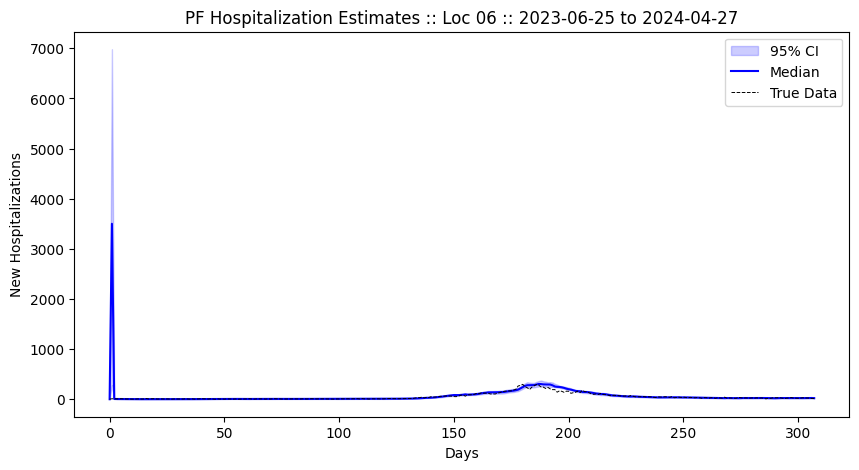

In [27]:
import matplotlib.pyplot as plt


quantiles = daily_estimates_df.quantile([0.025, 0.5, 0.975], axis=0)
plt.figure(figsize=(10, 5))
plt.fill_between(
    range(daily_estimates_df.shape[1]),
    quantiles.loc[0.025],
    quantiles.loc[0.975],
    color="b",
    alpha=0.2,
    label="95% CI",
)
plt.plot(
    range(daily_estimates_df.shape[1]), quantiles.loc[0.5], color="b", label="Median"
)
plt.plot(
    range(daily_estimates_df.shape[1]),
    subset_df["previous_day_admission_influenza_confirmed"],
    color="black",
    label="True Data",
    lw=0.7,
    ls="--",
)
plt.xlabel("Days")
plt.ylabel("New Hospitalizations")
plt.title("PF Hospitalization Estimates :: Loc 06 :: 2023-06-25 to 2024-04-27")
plt.legend()
plt.show()

In [16]:
mle_betas_path = os.path.join(os.path.join(loc_dir, "mle_betas_test_8:44_20241020.csv"))

betas_df = pd.read_csv(mle_betas_path)

In [17]:
betas_df.drop(columns=["Unnamed: 0"], inplace=True)

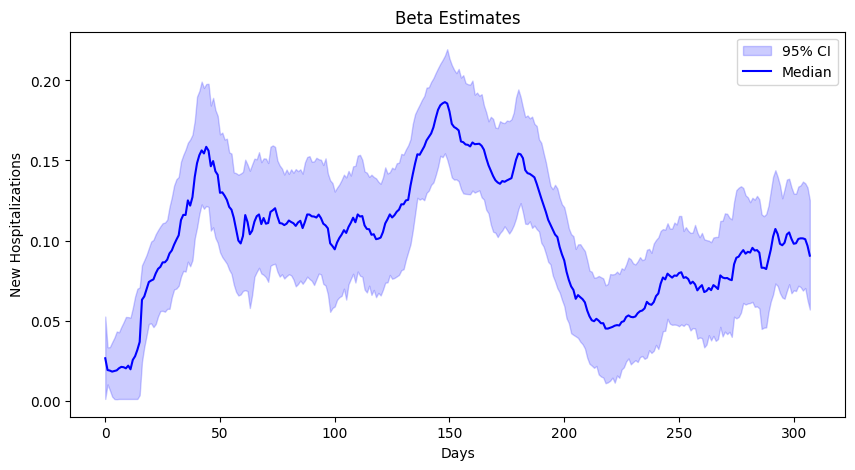

In [19]:
quantiles = betas_df.quantile([0.025, 0.5, 0.975], axis=0)
plt.figure(figsize=(10, 5))
plt.fill_between(
    range(betas_df.shape[1]),
    quantiles.loc[0.025],
    quantiles.loc[0.975],
    color="b",
    alpha=0.2,
    label="95% CI",
)
plt.plot(range(betas_df.shape[1]), quantiles.loc[0.5], color="b", label="Median")
plt.xlabel("Days")
plt.ylabel("New Hospitalizations")
plt.title("Beta Estimates")
plt.legend()
plt.show()